In [1]:
import cv2
import numpy as np
import pandas as pd
import os
import re
from tqdm import tqdm
from matplotlib import pyplot as plt
from PIL import Image
from Preprocessing_Functions import get_stats_from_paths

In [5]:
np.median(np.arange(16).reshape(4,4))

7.5

In [14]:
import os
os.path.abspath("")

'd:\\Nauka\\Polibuda\\Inżynierka\\Eye-Diesese-ML'

In [2]:
dirs_i_want = []
for root, dirs, files in os.walk("./data/train_data/"):
        for file in files:
            if file.endswith('jpeg'):
                dirs_i_want.append(
                    {'number': re.findall(r'\d+', file)[0],
                     'path' : root+'/'+file,
                     'filename' : file,
                     'dir': root.split('/')[-1],
                     'type' : file.split('_')[1].split('.')[0]})

data_df = pd.DataFrame(dirs_i_want)

In [3]:
data_df['dir'] = data_df['dir'].astype(str)
data_df.loc[data_df['dir'] != 'compressed']
data_df.loc[data_df['dir'] == 'compressed']

_ = data_df[['path','filename']].loc[data_df['dir'] != 'compressed']
_.columns = ['org_path','filename']
data_df = data_df.loc[data_df['dir'] != 'compressed'].merge(_,on='filename')

In [16]:
data_df

,number,path,filename,dir,type,org_path
0,10003,./data/train_data/not_compressed_1/10003_left....,10003_left.jpeg,not_compressed_1,left,./data/train_data/not_compressed_1/10003_left....
1,10003,./data/train_data/not_compressed_1/10003_right...,10003_right.jpeg,not_compressed_1,right,./data/train_data/not_compressed_1/10003_right...
2,10007,./data/train_data/not_compressed_1/10007_left....,10007_left.jpeg,not_compressed_1,left,./data/train_data/not_compressed_1/10007_left....
3,10007,./data/train_data/not_compressed_1/10007_right...,10007_right.jpeg,not_compressed_1,right,./data/train_data/not_compressed_1/10007_right...
4,10009,./data/train_data/not_compressed_1/10009_left....,10009_left.jpeg,not_compressed_1,left,./data/train_data/not_compressed_1/10009_left....
...,...,...,...,...,...,...
16797,29117,./data/train_data/not_compressed_2/29117_right...,29117_right.jpeg,not_compressed_2,right,./data/train_data/not_compressed_2/29117_right...
16798,2911,./data/train_data/not_compressed_2/2911_left.jpeg,2911_left.jpeg,not_compressed_2,left,./data/train_data/not_compressed_2/2911_left.jpeg
16799,2911,./data/train_data/not_compressed_2/2911_right....,2911_right.jpeg,not_compressed_2,right,./data/train_data/not_compressed_2/2911_right....
16800,29126,./data/train_data/not_compressed_2/29126_left....,29126_left.jpeg,not_compressed_2,left,./data/train_data/not_compressed_2/29126_left....


In [8]:
crop_df = pd.read_csv('./data/crop_stats.csv')

In [6]:
org_df = pd.DataFrame(get_stats_from_paths(data_df['org_path'].values))

100%|██████████| 16802/16802 [24:23<00:00, 11.48it/s]


In [7]:
org_df.to_csv('./data/org_stats.csv')

In [ ]:
'./data/train_data/not_compressed_1/194_right.jpeg'

In [10]:
pd.concat([data_df,org_df,crop_df],axis=1).columns

Index(['number', 'path', 'filename', 'dir', 'type', 'org_path',
       'org_all_edge_0_norm_count', 'org_all_edge_median', 'org_all_edge_mean',
       'org_right_edge_0_norm_count', 'org_right_edge_median',
       'org_right_edge_mean', 'org_bottom_edge_0_norm_count',
       'org_bottom_edge_median', 'org_bottom_edge_mean',
       'org_up_edge_0_norm_count', 'org_up_edge_median', 'org_up_edge_mean',
       'org_left_edge_0_norm_count', 'org_left_edge_median',
       'org_left_edge_mean', 'X_org', 'Y_org', 'error', 'Unnamed: 0',
       'crop_all_edge_0_norm_count', 'crop_all_edge_median',
       'crop_all_edge_mean', 'crop_right_edge_0_norm_count',
       'crop_right_edge_median', 'crop_right_edge_mean',
       'crop_bottom_edge_0_norm_count', 'crop_bottom_edge_median',
       'crop_bottom_edge_mean', 'crop_up_edge_0_norm_count',
       'crop_up_edge_median', 'crop_up_edge_mean',
       'crop_left_edge_0_norm_count', 'crop_left_edge_median',
       'crop_left_edge_mean', 'X_crop', 'Y_cr

In [4]:
org_df = pd.DataFrame(get_stats_from_paths(data_df['org_path'].values[8400:8450]))

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:04<00:00, 12.20it/s]


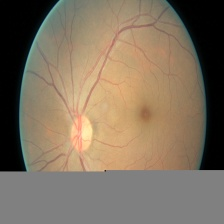

In [25]:
Image.open('./data/train_data/compressed/194_right.jpeg')

In [20]:
org_df

NameError: name 'org_df' is not defined

In [4]:
crop_df

,Unnamed: 0,crop_all_edge_0_norm_count,crop_all_edge_median,crop_all_edge_mean,crop_right_edge_0_norm_count,crop_right_edge_median,crop_right_edge_mean,crop_bottom_edge_0_norm_count,crop_bottom_edge_median,crop_bottom_edge_mean,crop_up_edge_0_norm_count,crop_up_edge_median,crop_up_edge_mean,crop_left_edge_0_norm_count,crop_left_edge_median,crop_left_edge_mean,X_crop,Y_crop
0,0,0.641256,0.0,7.784753,0.629464,0.0,7.401786,0.642857,0.0,7.598214,0.620536,0.0,8.245536,0.620536,0.0,8.245536,224,224
1,1,0.640135,0.0,8.008969,0.696429,0.0,7.973214,0.647321,0.0,7.883929,0.598214,0.0,8.526786,0.598214,0.0,8.526786,224,224
2,2,0.673767,0.0,9.991031,0.611607,0.0,12.544643,0.736607,0.0,7.656250,0.651786,0.0,11.129464,0.651786,0.0,11.129464,224,224
3,3,0.704036,0.0,8.873318,0.709821,0.0,8.477679,0.741071,0.0,7.290179,0.678571,0.0,10.459821,0.678571,0.0,10.459821,224,224
4,4,0.341928,5.0,28.206278,0.468750,1.0,10.330357,0.236607,71.0,47.187500,0.254464,60.0,42.491071,0.254464,60.0,42.491071,224,224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16797,16797,0.421621,4.0,36.934411,0.592207,0.0,7.380015,0.299124,80.0,57.005006,0.302879,96.0,64.030350,0.302879,96.0,64.030350,2592,3196
16798,16798,0.824338,0.0,2.631410,0.731183,0.0,2.389992,0.884711,0.0,1.820248,0.815289,0.0,3.519008,0.815289,0.0,3.519008,2418,2420
16799,16799,0.852078,0.0,2.408724,0.816377,0.0,0.739454,0.892193,0.0,1.986782,0.814539,0.0,4.187113,0.814539,0.0,4.187113,2418,2421
16800,16800,0.870415,0.0,2.963019,0.880227,0.0,2.576127,0.858124,0.0,3.531124,0.873080,0.0,2.818513,0.873080,0.0,2.818513,2463,2474


In [13]:
data_df.groupby('dir').count()

,number,path,filename,type
dir,,,,
compressed,16802,16802,16802,16802
not_compressed_1,8408,8408,8408,8408
not_compressed_2,8394,8394,8394,8394


In [15]:
data_df.loc[data_df.dir != 'compressed']

,number,path,filename,dir,type
16802,10003,./data/train_data/not_compressed_1/10003_left....,10003_left.jpeg,not_compressed_1,left
16803,10003,./data/train_data/not_compressed_1/10003_right...,10003_right.jpeg,not_compressed_1,right
16804,10007,./data/train_data/not_compressed_1/10007_left....,10007_left.jpeg,not_compressed_1,left
16805,10007,./data/train_data/not_compressed_1/10007_right...,10007_right.jpeg,not_compressed_1,right
16806,10009,./data/train_data/not_compressed_1/10009_left....,10009_left.jpeg,not_compressed_1,left
...,...,...,...,...,...
33599,29117,./data/train_data/not_compressed_2/29117_right...,29117_right.jpeg,not_compressed_2,right
33600,2911,./data/train_data/not_compressed_2/2911_left.jpeg,2911_left.jpeg,not_compressed_2,left
33601,2911,./data/train_data/not_compressed_2/2911_right....,2911_right.jpeg,not_compressed_2,right
33602,29126,./data/train_data/not_compressed_2/29126_left....,29126_left.jpeg,not_compressed_2,left


In [56]:
data_df['filename'] = data_df['filename'].astype(str)
_ = data_df[['filename','path']].loc[data_df.dir != 'compressed']
_.columns = ['filename','org_path']
data_df = pd.merge(data_df.loc[data_df.dir == 'compressed'],_)

In [49]:
data_df['filename'].value_counts()

filename
10003_left.jpeg     2
22744_left.jpeg     2
22746_left.jpeg     2
22746_right.jpeg    2
22747_left.jpeg     2
                   ..
16393_left.jpeg     2
16393_right.jpeg    2
16395_left.jpeg     2
16395_right.jpeg    2
29126_right.jpeg    2
Name: count, Length: 16802, dtype: int64

In [32]:
data_df['path']

filename
10003_left.jpeg          ./data/train_data/compressed/10003_left.jpeg
10003_right.jpeg        ./data/train_data/compressed/10003_right.jpeg
10007_left.jpeg          ./data/train_data/compressed/10007_left.jpeg
10007_right.jpeg        ./data/train_data/compressed/10007_right.jpeg
10009_left.jpeg          ./data/train_data/compressed/10009_left.jpeg
                                          ...                        
29117_right.jpeg    ./data/train_data/not_compressed_2/29117_right...
2911_left.jpeg      ./data/train_data/not_compressed_2/2911_left.jpeg
2911_right.jpeg     ./data/train_data/not_compressed_2/2911_right....
29126_left.jpeg     ./data/train_data/not_compressed_2/29126_left....
29126_right.jpeg    ./data/train_data/not_compressed_2/29126_right...
Name: path, Length: 33604, dtype: object

In [66]:
arr=np.arange(16).reshape(4,4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [70]:
arr[:,-1] 

array([ 3,  7, 11, 15])

In [69]:
arr[-1,:] 

array([12, 13, 14, 15])

In [71]:
arr[0,:]

array([0, 1, 2, 3])

In [72]:
arr[:,0]

array([ 0,  4,  8, 12])

In [29]:
data_df.index = data_df['filename']

In [30]:
data_df.join()

,number,path,filename,dir,type
filename,,,,,
10003_left.jpeg,10003,./data/train_data/compressed/10003_left.jpeg,10003_left.jpeg,compressed,left
10003_right.jpeg,10003,./data/train_data/compressed/10003_right.jpeg,10003_right.jpeg,compressed,right
10007_left.jpeg,10007,./data/train_data/compressed/10007_left.jpeg,10007_left.jpeg,compressed,left
10007_right.jpeg,10007,./data/train_data/compressed/10007_right.jpeg,10007_right.jpeg,compressed,right
10009_left.jpeg,10009,./data/train_data/compressed/10009_left.jpeg,10009_left.jpeg,compressed,left
...,...,...,...,...,...
29117_right.jpeg,29117,./data/train_data/not_compressed_2/29117_right...,29117_right.jpeg,not_compressed_2,right
2911_left.jpeg,2911,./data/train_data/not_compressed_2/2911_left.jpeg,2911_left.jpeg,not_compressed_2,left
2911_right.jpeg,2911,./data/train_data/not_compressed_2/2911_right....,2911_right.jpeg,not_compressed_2,right


In [24]:
pd.concat([data_df.loc[data_df.dir == 'compressed'],data_df['path'].loc[data_df.dir != 'compressed']],axis=1)

,number,path,filename,dir,type,path
0,10003,./data/train_data/compressed/10003_left.jpeg,10003_left.jpeg,compressed,left,NaN
1,10003,./data/train_data/compressed/10003_right.jpeg,10003_right.jpeg,compressed,right,NaN
2,10007,./data/train_data/compressed/10007_left.jpeg,10007_left.jpeg,compressed,left,NaN
3,10007,./data/train_data/compressed/10007_right.jpeg,10007_right.jpeg,compressed,right,NaN
4,10009,./data/train_data/compressed/10009_left.jpeg,10009_left.jpeg,compressed,left,NaN
...,...,...,...,...,...,...
33599,NaN,NaN,NaN,NaN,NaN,./data/train_data/not_compressed_2/29117_right...
33600,NaN,NaN,NaN,NaN,NaN,./data/train_data/not_compressed_2/2911_left.jpeg
33601,NaN,NaN,NaN,NaN,NaN,./data/train_data/not_compressed_2/2911_right....
33602,NaN,NaN,NaN,NaN,NaN,./data/train_data/not_compressed_2/29126_left....


In [59]:
dirs_i_want = []
for root, dirs, files in os.walk("./data/train_data/not_compressed_2"):
        for file in files:
            if file.endswith('jpeg'):
                dirs_i_want.append(
                    {'number': re.findall(r'\d+', file)[0],
                     'path' : root+'/'+file,
                     'type' : file.split('_')[1].split('.')[0]})

data_df = pd.DataFrame(dirs_i_want)

In [87]:
# stats = []
# for path in tqdm(data_df.path.values):
#      stats.append(preprocess_one_img(path=path,save_path='./data/train_data/compressed'))

100%|██████████| 8394/8394 [40:46<00:00,  3.43it/s]


In [91]:
data_df = pd.concat([data_df,pd.DataFrame(stats)],axis=1) 

In [92]:
data_df.to_csv('./data/2_slice.csv')

<Axes: ylabel='Density'>

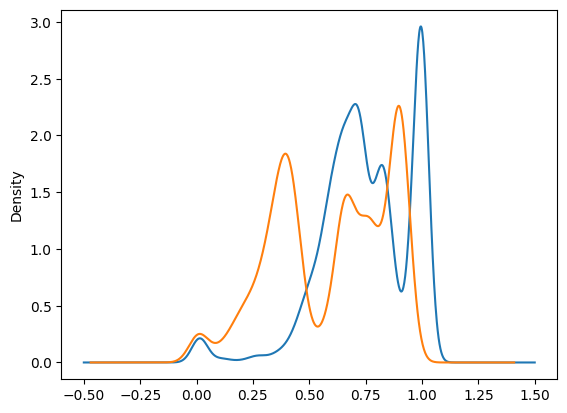

In [106]:
data_df.org_edge_0_norm_count.plot.density()
data_df.crop_edge_0_norm_count.plot.density()
#data_df.loc[data_df.crop_edge_median> 50].crop_edge_0_norm_count.plot.density()

In [105]:
data_df.loc[data_df['crop_edge_0_norm_count']<0.2].type.value_counts()

type
left     278
right    227
Name: count, dtype: int64

In [102]:
len(data_df.loc[data_df.crop_edge_median> 50])

550

<Axes: ylabel='Density'>

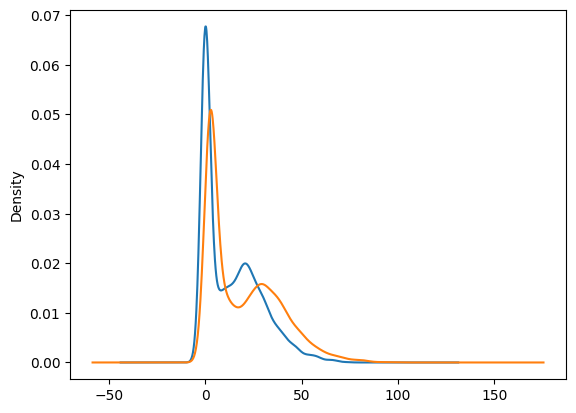

In [97]:
data_df['org_edge_median'].plot.density()
data_df['crop_edge_median'].plot.density()


In [ ]:
re.findall(r'\d+', "hello 42 I'm a 32 string 30")

In [28]:
dirs_i_want

['19500_left.jpeg',
 '19500_right.jpeg',
 '19503_left.jpeg',
 '19503_right.jpeg',
 '19504_left.jpeg',
 '19504_right.jpeg',
 '19505_left.jpeg',
 '19505_right.jpeg',
 '19506_left.jpeg',
 '19506_right.jpeg',
 '19507_left.jpeg',
 '19507_right.jpeg',
 '19508_left.jpeg',
 '19508_right.jpeg',
 '19510_left.jpeg',
 '19510_right.jpeg',
 '19512_left.jpeg',
 '19512_right.jpeg',
 '19515_left.jpeg',
 '19515_right.jpeg',
 '19516_left.jpeg',
 '19516_right.jpeg',
 '19518_left.jpeg',
 '19518_right.jpeg',
 '19520_left.jpeg',
 '19520_right.jpeg',
 '19521_left.jpeg',
 '19521_right.jpeg',
 '19522_left.jpeg',
 '19522_right.jpeg',
 '19525_left.jpeg',
 '19525_right.jpeg',
 '19531_left.jpeg',
 '19531_right.jpeg',
 '19535_left.jpeg',
 '19535_right.jpeg',
 '19536_left.jpeg',
 '19536_right.jpeg',
 '1953_left.jpeg',
 '1953_right.jpeg',
 '19542_left.jpeg',
 '19542_right.jpeg',
 '19549_left.jpeg',
 '19549_right.jpeg',
 '19553_left.jpeg',
 '19553_right.jpeg',
 '19555_left.jpeg',
 '19555_right.jpeg',
 '1955_left.jpeg',

In [ ]:
"./data/"